# Assignment 4

The assignment 4 contains 3 questions and the due date is May 9th (Sunday) 23:59PM.

# STUDENT NAME: ISABEL MORA LABARCA (48516)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf

## Question 1 Celonis Automation Bootcamp (20 points)

In this question, you are simply asked to complete the bootcamp and upload the badge or compleion proof. 


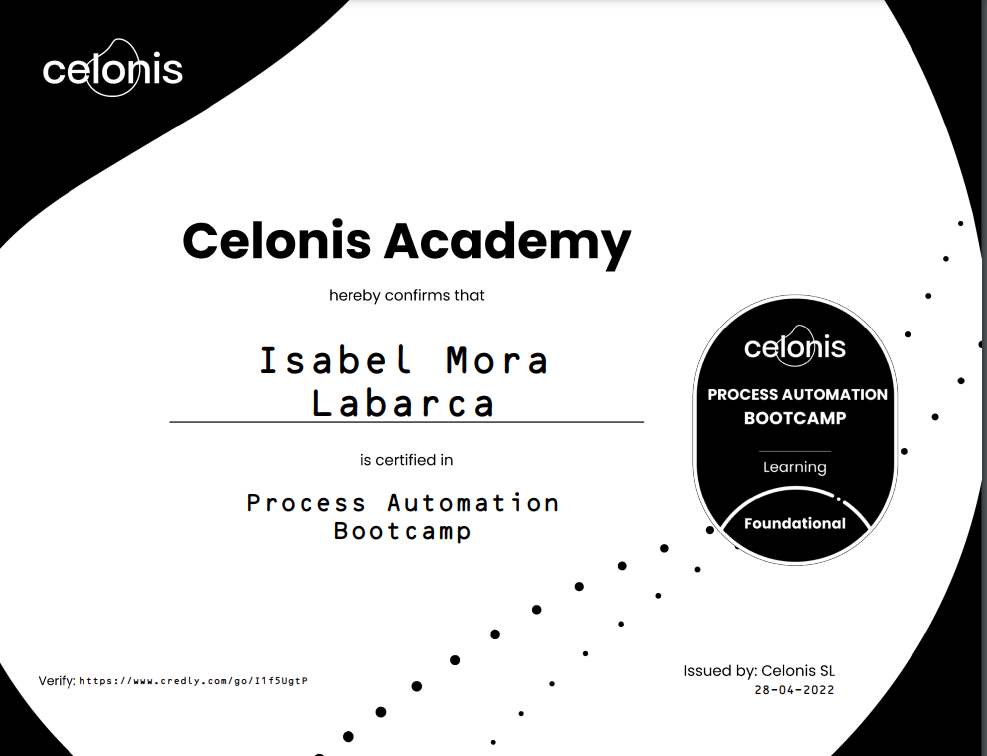

## Question 2 Training a deep neural network (80 points)

Practice training a deep neural network on the CIFAR10 image dataset:


In [3]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

### Question 2.1 (10 points) 

Build a Deep Neural Network (DNN) with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this question), using the RELU activation function.

Using Adam optimization, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_ data() (see code below). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 5000 of which is for validation, 10,000 for testing) with 10 classes using sparse_categorical_crossentropy loss function , so you’ll need a softmax output layer with 10 neurons. 

Train the model for 100 epochs, explain whether the model will experience overfitting. 

#### Build a Deep Neural Network (DNN) with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this question), using the RELU activation function.

In [4]:
# parameters that were not specified will be left at default

tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

# add 20 hidden layers of 100 neurons each + relu activation 
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="relu")) # kernel_initializer default (glorot uniform)

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

In [10]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 32, 32, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 32, 32, 3),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 100,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'uni

Using **Adam** optimization, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_ data() (see code below). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 5000 of which is for validation, 10,000 for testing) with 10 classes using sparse_categorical_crossentropy loss function , so you’ll need a softmax output layer with 10 neurons.

In [11]:
# add output layer

model.add(keras.layers.Dense(10, activation="softmax"))

In [12]:
# adam optimization

adam_optimizer = keras.optimizers.Adam()  #default learning rate of 0.001
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=adam_optimizer,
              metrics=["accuracy"])

Train the model for **100 epochs**, explain whether the model will experience overfitting.

In [13]:
history = model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 12s 7ms/step - loss: 2.0982 - accuracy: 0.1739 - val_loss: 2.0293 - val_accuracy: 0.2058
Epoch 2/100
1407/1407 [==============================] - 9s 6ms/step - loss: 2.0136 - accuracy: 0.2006 - val_loss: 1.9797 - val_accuracy: 0.2092
Epoch 3/100
1407/1407 [==============================] - 9s 7ms/step - loss: 1.9803 - accuracy: 0.2122 - val_loss: 1.9745 - val_accuracy: 0.2232
Epoch 4/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.9542 - accuracy: 0.2269 - val_loss: 2.0361 - val_accuracy: 0.2168
Epoch 5/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.9290 - accuracy: 0.2458 - val_loss: 1.9163 - val_accuracy: 0.2678
Epoch 6/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.9103 - accuracy: 0.2635 - val_loss: 1.9236 - val_accuracy: 0.2634
Epoch 7/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8914 - accuracy: 0.2687 - val_loss: 1.9101 - val_a

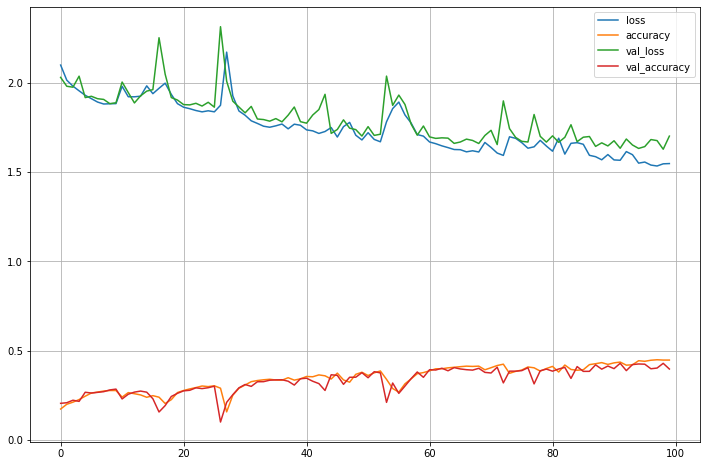

In [14]:
# Plot loss and accuracy to compare

pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.show()

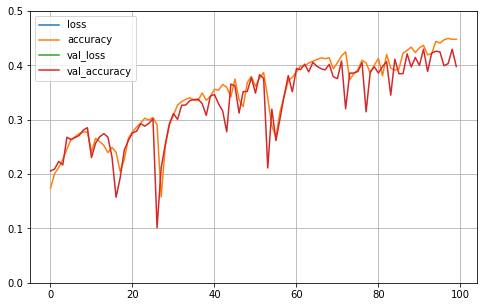

In [75]:
# Plot accuracy only 

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.5) # set the vertical range to [0-0.5] focus only on accuracy
plt.show()

In [76]:
# evaluate the model

evaluation_valid = model.evaluate(X_valid, y_valid)
evaluation_test = model.evaluate(X_test, y_test)
evaluation_train = model.evaluate(X_train, y_train)

print(f"Evaluation on validation data: {evaluation_valid}")
print(f"Evaluation on train data: {evaluation_train}")
print(f"Evaluation on test data: {evaluation_test}")

1407/1407 [==============================] - 11s 8ms/step - loss: 1.6032 - accuracy: 0.4159
Evaluation on validation data: [1.700795292854309, 0.3977999985218048]
Evaluation on train data: [1.6032177209854126, 0.4158666729927063]
Evaluation on test data: [1.6944302320480347, 0.387800008058548]


**Explain whether the model will experience overfitting.**

- We can see that both the training accuracy and the validation accuracy increase during training (both with markedly falls, probably as a result of gradients attempting to converge), while the training loss and the validation loss slightly decrease. This overall is a good sign, meaning that there is not much overfitting happenning in our model.
- Moreover, the validation curves are close to the training curves, which suplports that there is not too much overfitting. 
- One thing is interesting: at the beginning of training (epoch = 1), it seems that the model actually performed better on the validation set than on the training set. However, this assumption is wrong, because the validation error is only computed at the end of each epoch, while the training error is computed using a running mean during each epoch. So if we shift the training curve by half an epoch to the left, we would probably see that the training and validation curves overlap even more. 

### Question 2.2 (10 points)

Try reduce the overfitting with weight regularization. You can try to add a L2-norm penalty term as the kernel_regularizer. Repeat the previous training process and explain whether regularization helps achieve a better result.

In [19]:
tf.random.set_seed(42)
np.random.seed(42)

model_l2 = keras.models.Sequential()
model_l2.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model_l2.add(keras.layers.Dense(100,
                                 activation="relu",
                                    kernel_regularizer=keras.regularizers.l2(0.01)))

In [21]:
# add output layer 
model_l2.add(keras.layers.Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.01)))

# compile (same configuration)
model_l2.compile(loss="sparse_categorical_crossentropy",
              optimizer=adam_optimizer,
              metrics=["accuracy"])

In [22]:
history_l2 = model_l2.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 14s 8ms/step - loss: 2.4405 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.0976
Epoch 2/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3029 - accuracy: 0.1016 - val_loss: 2.3031 - val_accuracy: 0.0972
Epoch 3/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3029 - accuracy: 0.1010 - val_loss: 2.3029 - val_accuracy: 0.1010
Epoch 4/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3030 - accuracy: 0.0962 - val_loss: 2.3027 - val_accuracy: 0.0996
Epoch 5/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3029 - accuracy: 0.1002 - val_loss: 2.3029 - val_accuracy: 0.0972
Epoch 6/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3030 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.0920
Epoch 7/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3029 - accuracy: 0.0981 - val_loss: 2.3033 -

Epoch 57/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3029 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.0996
Epoch 58/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3029 - accuracy: 0.0992 - val_loss: 2.3029 - val_accuracy: 0.0972
Epoch 59/100
1407/1407 [==============================] - 9s 7ms/step - loss: 2.3029 - accuracy: 0.0996 - val_loss: 2.3025 - val_accuracy: 0.1038
Epoch 60/100
1407/1407 [==============================] - 9s 7ms/step - loss: 2.3029 - accuracy: 0.0978 - val_loss: 2.3025 - val_accuracy: 0.0996
Epoch 61/100
1407/1407 [==============================] - 11s 8ms/step - loss: 2.3029 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1040
Epoch 62/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3029 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.0976
Epoch 63/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.1008 - val_loss: 2.3

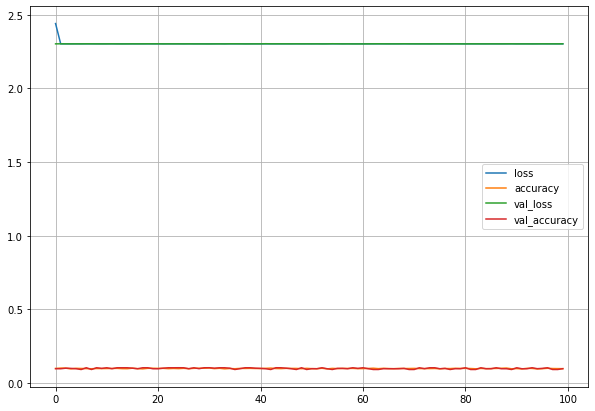

In [24]:
# plot results
pd.DataFrame(history_l2.history).plot(figsize=(10, 7))
plt.grid(True)
plt.show()

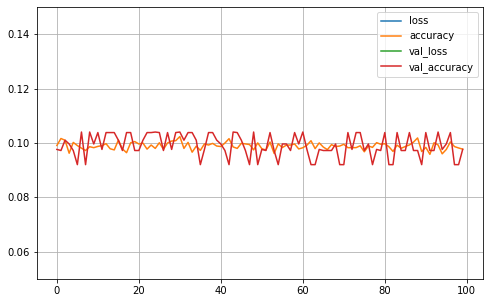

In [83]:
# Plot accuracy only 

pd.DataFrame(history_l2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.05, 0.15) # set the vertical range to [0-0.2] focus only on accuracy
plt.show()

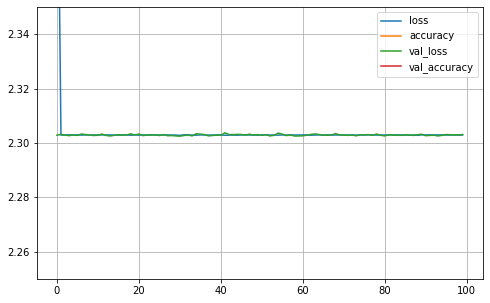

In [101]:
# Plot loss only 

pd.DataFrame(history_l2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(2.25, 2.35)
plt.show()

In [84]:
# evaluate the model

evaluation_l2_valid = model_l2.evaluate(X_valid, y_valid)
evaluation_l2_test = model_l2.evaluate(X_test, y_test)
evaluation_l2_train = model_l2.evaluate(X_train, y_train)

print(f"Evaluation on validation data: {evaluation_l2_valid}")
print(f"Evaluation on train data: {evaluation_l2_train}")
print(f"Evaluation on test data: {evaluation_l2_test}")

1407/1407 [==============================] - 12s 8ms/step - loss: 2.3027 - accuracy: 0.1003
Evaluation on validation data: [2.303079128265381, 0.09759999811649323]
Evaluation on train data: [2.302701473236084, 0.10026666522026062]
Evaluation on test data: [2.3027403354644775, 0.10000000149011612]


**Explain whether regularization helps achieve a better result.**

- We were already expecting that the training accuracy would decrease, however, the test accuracy also decreased significantly.
- Because both our test and train accuracies decreased, this is a potential sign of underfitting. 
- L2 regularization is used to prevent the model from overfitting on the training data, and so it penalizes the network for having large values for weights. Thus, the loss increased when compared to the previous model, becuase it's harder to fit (and of course, overfit) the training data
- Regularization in our case did not help achieve a better result. The optimal solutions might need better weights, and we concluded previously that the model was not overfitting, thus there was little need for regularization. Smaller rates could be tested to see if performance improves with L2 regularization

### Question 2.3 (10 points)

Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

---

**Because there is some debate regarding whether BN layer should be placed before or after the activation function, I will test both methods to compare**
- Note: I asked the professor during office hours on whether we had to add the new layers on the previous model, and he said yes, so I will add BN + L2 regularization, although the L2 regularization actually decreased significanly my model performance

**1. model_BN1 : BN layer after every dense layer, BEFORE the activation function, except for the output layer**

In [26]:
tf.random.set_seed(42)

model_BN1 = tf.keras.Sequential()
model_BN1.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))

# Added a BN layer after every Dense layer (before the activation function), except for the output layer
# To do this, we need to separate the activation function from the dense layer

for _ in range(20):
    model_BN1.add(tf.keras.layers.Dense(100, kernel_regularizer=keras.regularizers.l2(0.01)))
    model_BN1.add(tf.keras.layers.BatchNormalization())
    model_BN1.add(tf.keras.layers.Activation("relu"))
    
    
# Keeping output layer the same as before

model_BN1.add(tf.keras.layers.Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.01)))

model_BN1.compile(loss="sparse_categorical_crossentropy",
              optimizer=adam_optimizer,
              metrics=["accuracy"])

BN1_history = model_BN1.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 26s 13ms/step - loss: 8.0545 - accuracy: 0.1854 - val_loss: 3.4703 - val_accuracy: 0.1654
Epoch 2/100
1407/1407 [==============================] - 16s 11ms/step - loss: 2.8481 - accuracy: 0.1609 - val_loss: 2.7541 - val_accuracy: 0.0938
Epoch 3/100
1407/1407 [==============================] - 16s 11ms/step - loss: 2.6845 - accuracy: 0.1607 - val_loss: 3.6497 - val_accuracy: 0.0998
Epoch 4/100
1407/1407 [==============================] - 16s 11ms/step - loss: 2.6935 - accuracy: 0.1474 - val_loss: 3.0629 - val_accuracy: 0.0972
Epoch 5/100
1407/1407 [==============================] - 16s 11ms/step - loss: 2.5429 - accuracy: 0.1573 - val_loss: 2.8893 - val_accuracy: 0.0980
Epoch 6/100
1407/1407 [==============================] - 16s 11ms/step - loss: 2.5929 - accuracy: 0.1580 - val_loss: 3.0632 - val_accuracy: 0.1038
Epoch 7/100
1407/1407 [==============================] - 16s 11ms/step - loss: 2.6687 - accuracy: 0.1661 - val_loss: 2

In [27]:
# evaluate the model

evaluation_BN1_valid = model_BN1.evaluate(X_valid, y_valid)
evaluation_BN1_test = model_BN1.evaluate(X_test, y_test)
evaluation_BN1_train = model_BN1.evaluate(X_train, y_train)

print(f"Evaluation on validation data: {evaluation_BN1_valid}")
print(f"Evaluation on train data: {evaluation_BN1_train}")
print(f"Evaluation on test data (Generalization error): {evaluation_BN1_test}")

1407/1407 [==============================] - 10s 7ms/step - loss: 2.4893 - accuracy: 0.1154
Evaluation on validation data: [2.4868037700653076, 0.12479999661445618]
Evaluation on train data: [2.489262104034424, 0.11540000140666962]
Evaluation on test data (Generalization error): [2.490575075149536, 0.1145000010728836]


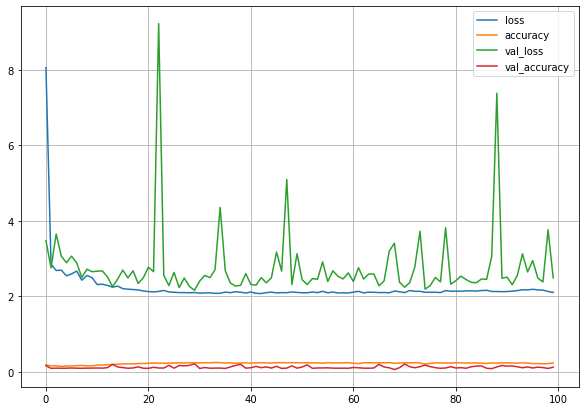

In [28]:
pd.DataFrame(BN1_history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.show()

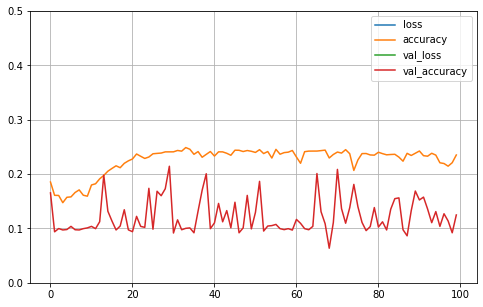

In [86]:
# Plot accuracy only 

pd.DataFrame(BN1_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.5) # set the vertical range to [0-0.2] focus only on accuracy
plt.show()

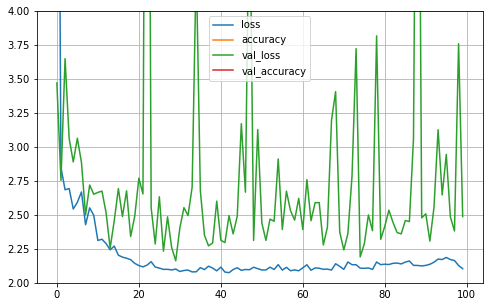

In [90]:
# plot loss only

pd.DataFrame(BN1_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(2, 4) # set the vertical range to [0-0.4] focus only on accuracy
plt.show()

**Findings so far**
- Slightly Better than with only regularization
- Significantly Worse than the plain model
- Might be better to test only with BN, without L2 regularization

**Is it converging faster than before? Does it produce a better model? How does it affect training speed?**
- L2 regularization model achieved the lowest validation loss (around 2.3) pretty much at the beginning of training, while our model with Batch Normalization found a similar validation loss after around 30 epochs (shown in the plot), and the model without any regularization/normalization had the lowest validation loss (of around 1.75) way later (around at 70 epochs). 
- With BN seems tht convergence is faster than in original model but it is not optimal.
- Regarding model performance, the first model had an accuracy of 39 %, while the one with L2 regularization only achieved 10 %. With BN + L2, we achieved an accuracy of 11.4 %, way worse than our first model but only slightly better than only regularization.
- The training speed decreases because of the extra computations made for each BN layer. Thus, the first model took around 8 secs per epoch, the one with L2 regularization around 10 secs, and the one with L2 + BN around 20 secs per epoch.

**2. model_BN2 : BN layer AFTER the activation function**

In [29]:
tf.random.set_seed(42)

model_BN2 = tf.keras.Sequential()
model_BN2.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
model_BN2.add(tf.keras.layers.BatchNormalization())

for _ in range(20):
    model_BN2.add(tf.keras.layers.Dense(100, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)))
    model_BN2.add(tf.keras.layers.BatchNormalization())
    
#ouptut layer
model_BN2.add(tf.keras.layers.Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.01)))

model_BN2.compile(loss="sparse_categorical_crossentropy",
              optimizer=adam_optimizer,
              metrics=["accuracy"])

BN2_history = model_BN2.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 50s 21ms/step - loss: 12.7006 - accuracy: 0.1992 - val_loss: 6.1653 - val_accuracy: 0.1608
Epoch 2/100
1407/1407 [==============================] - 28s 20ms/step - loss: 4.0831 - accuracy: 0.2126 - val_loss: 3.0007 - val_accuracy: 0.2016
Epoch 3/100
1407/1407 [==============================] - 28s 20ms/step - loss: 2.7106 - accuracy: 0.1836 - val_loss: 2.6867 - val_accuracy: 0.0972
Epoch 4/100
1407/1407 [==============================] - 29s 20ms/step - loss: 2.4807 - accuracy: 0.1748 - val_loss: 2.9529 - val_accuracy: 0.1368
Epoch 5/100
1407/1407 [==============================] - 28s 20ms/step - loss: 2.4409 - accuracy: 0.1724 - val_loss: 2.5963 - val_accuracy: 0.0996
Epoch 6/100
1407/1407 [==============================] - 28s 20ms/step - loss: 2.7046 - accuracy: 0.1518 - val_loss: 2.6253 - val_accuracy: 0.1070
Epoch 7/100
1407/1407 [==============================] - 30s 21ms/step - loss: 2.4697 - accuracy: 0.1738 - val_loss: 

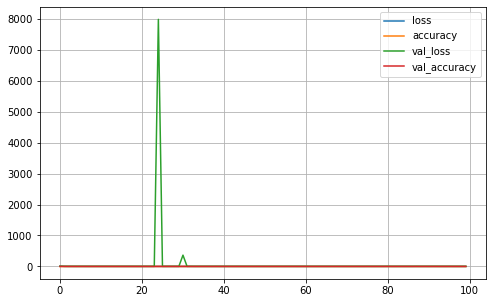

In [88]:
# Plot results
pd.DataFrame(BN2_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

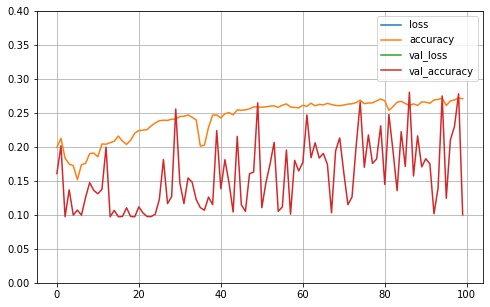

In [34]:
# accuracy only
pd.DataFrame(BN2_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.4) # set the vertical range to [0-0.4] focus only on accuracy
plt.show()

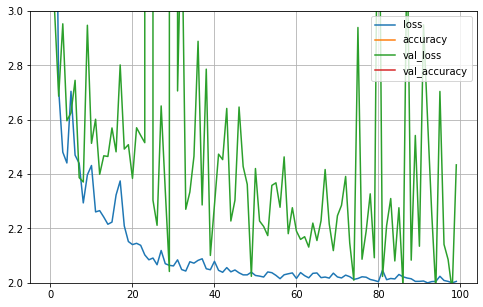

In [92]:
# loss only
pd.DataFrame(BN2_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(2, 3) # set the vertical range to [0-0.4] focus only on accuracy
plt.show()

In [89]:
# evaluate the model
evaluation_BN2_valid = model_BN2.evaluate(X_valid, y_valid)
evaluation_BN2_test = model_BN2.evaluate(X_test, y_test)
evaluation_BN2_train = model_BN2.evaluate(X_train, y_train)

print(f"Evaluation on validation data: {evaluation_BN2_valid}")
print(f"Evaluation on train data: {evaluation_BN2_train}")
print(f"Evaluation on test data: {evaluation_BN2_test}")

1407/1407 [==============================] - 18s 12ms/step - loss: 2.4342 - accuracy: 0.0999
Evaluation on validation data: [2.433943271636963, 0.10019999742507935]
Evaluation on train data: [2.434197425842285, 0.0998888909816742]
Evaluation on test data: [2.4340579509735107, 0.10010000318288803]


***Findings***:

- Regarding the comparison of each BN set up, there seems to be little difference in our case for placing the BN layer before or after the activation function. However, placing the BN layer before the activation function resulted in a better accuracy by 1.4 %
    
    
- L2 regularization model achieved the lowest validation loss (around 2.3) pretty much at the beginning of training, while our model with Batch Normalization found a similar validation loss after around 30 epochs (shown in the plot), and the model without any regularization/normalization had the lowest validation loss (of around 1.75) way later (around at 70 epochs). 
- With BN seems that convergence is faster than original model but it is not optimal.
- Regarding model performance, the first model had an accuracy of 39 %, while the one with L2 regularization only achieved 10 %. With BN + L2, in this setup (the BN layer after activation function), we achieved an accuracy of 10 %, way worse than our first model and same performance than with only L2 regularization.
- The training speed decreases because of the extra computations made for each BN layer. Thus, the first model took around 8 secs per epoch, the one with L2 regularization around 10 secs, and the one with L2 + BN ranged between 14 and 28 secs per epoch. 
- Thus, adding the BN layer to the L2 regularization seems to increase training speed significantly and, in this case, there is no tradeoff regarding the accuracy.

---

### Extra: I will test how would the model have performed only with BN, without regularization

In [94]:
# Selected the BN1 (batch before activation function) since it gave a slight better accuracy on test set

tf.random.set_seed(42)

model_BN = tf.keras.Sequential()
model_BN.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model_BN.add(tf.keras.layers.Dense(100))
    model_BN.add(tf.keras.layers.BatchNormalization())
    model_BN.add(tf.keras.layers.Activation("relu"))

model_BN.add(tf.keras.layers.Dense(10, activation="softmax"))

model_BN.compile(loss="sparse_categorical_crossentropy",
              optimizer=adam_optimizer,
              metrics=["accuracy"])

BN_history = model_BN.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 67s 33ms/step - loss: 2.0541 - accuracy: 0.2478 - val_loss: 1.9226 - val_accuracy: 0.2832
Epoch 2/100
1407/1407 [==============================] - 44s 31ms/step - loss: 1.8987 - accuracy: 0.3112 - val_loss: 1.8367 - val_accuracy: 0.3450
Epoch 3/100
1407/1407 [==============================] - 41s 29ms/step - loss: 1.8098 - accuracy: 0.3494 - val_loss: 1.8218 - val_accuracy: 0.3542
Epoch 4/100
1407/1407 [==============================] - 45s 32ms/step - loss: 1.7438 - accuracy: 0.3789 - val_loss: 1.8721 - val_accuracy: 0.3432
Epoch 5/100
1407/1407 [==============================] - 41s 29ms/step - loss: 1.6875 - accuracy: 0.4022 - val_loss: 1.7806 - val_accuracy: 0.3668
Epoch 6/100
1407/1407 [==============================] - 43s 30ms/step - loss: 1.6444 - accuracy: 0.4189 - val_loss: 1.6808 - val_accuracy: 0.3994
Epoch 7/100
1407/1407 [==============================] - 46s 33ms/step - loss: 1.5944 - accuracy: 0.4356 - val_loss: 1

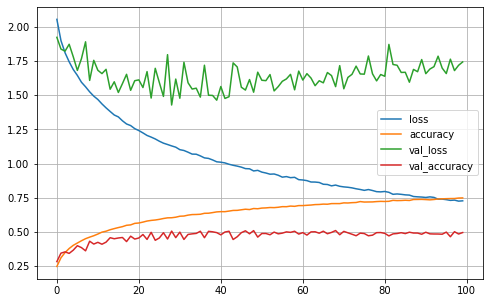

In [95]:
# Plot results
pd.DataFrame(BN_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [96]:
# evaluate the model
evaluation_BN_valid = model_BN.evaluate(X_valid, y_valid)
evaluation_BN_test = model_BN.evaluate(X_test, y_test)
evaluation_BN_train = model_BN.evaluate(X_train, y_train)

print(f"Evaluation on validation data: {evaluation_BN_valid}")
print(f"Evaluation on train data: {evaluation_BN_train}")
print(f"Evaluation on test data: {evaluation_BN_test}")

1407/1407 [==============================] - 4s 3ms/step - loss: 0.7160 - accuracy: 0.7530
Evaluation on validation data: [1.7428661584854126, 0.49559998512268066]
Evaluation on train data: [0.7159907221794128, 0.7529777884483337]
Evaluation on test data: [1.7548366785049438, 0.48420000076293945]


**Is the model converging faster than before?** 
- In this case, it is converging much faster. The plain(non-regularized) model took around 70 epochs to reach the lowest validation loss (1.75), while the BN only model achieved that same loss in just 5 epochs and continued to make progress until around the 20th epoch. The BN layers stabilized training and allowed us to use a much larger learning rate, so convergence was faster.

**Does BN produce a better model?** 
- The BN model is also much better than the nonregularized model, with 48% accuracy instead of 38%. It's still not a very good model, but at least it's much better than before. Moreover, it is important to note here that only using BN without regularization seems to actually produce overfitting, since the loss decreases and accuracy increases (as seen in hte plot, they both reach 0.75), but the validation loss and validation accuracy remained similar for a long period during training.

**How does BN affect training speed?** 
- Although the model converged much faster, each epoch took about 13s instead of 8s, because of the extra computations required by the BN layers.

### Question 2.4 (10 points)

Try regularizing the model with dropout. Then, without retraining your model, see if you can achieve better accuracy using different rate of Dropout.

***Note: as mentioned earlier, I will keep the configuration from previous questions. So far, we are using***:
- L2 regularization
- Batch Normalization
- Dropout (included now)

Thus, we would aim to get over 10 % accuracy (the model that we trained with L2 and BN)

### Testing with model_BN1

In [53]:
# using the BN before activation function (BN1 set up)
# dropout rate of 0.2

tf.random.set_seed(42)

model_drop_BN1 = tf.keras.Sequential()
model_drop_BN1.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))

# Added a BN layer after every Dense layer (before the activation function), except for the output layer
# To do this, we need to separate the activation function from the dense layer

for _ in range(20):
    model_drop_BN1.add(tf.keras.layers.Dense(100, kernel_regularizer=keras.regularizers.l2(0.01)))
    model_drop_BN1.add(tf.keras.layers.BatchNormalization())
    model_drop_BN1.add(tf.keras.layers.Activation("relu"))
    model_drop_BN1.add(keras.layers.Dropout(rate=0.2))
    
    
# Keeping output layer the same as before
model_drop_BN1.add(tf.keras.layers.Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.01)))

model_drop_BN1.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adam",
              metrics=["accuracy"])

BN1_drop_history = model_drop_BN1.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 21s 12ms/step - loss: 14.7666 - accuracy: 0.1215 - val_loss: 7.7994 - val_accuracy: 0.0994
Epoch 2/100
1407/1407 [==============================] - 17s 12ms/step - loss: 4.9070 - accuracy: 0.1603 - val_loss: 3.3598 - val_accuracy: 0.1618
Epoch 3/100
1407/1407 [==============================] - 17s 12ms/step - loss: 3.1499 - accuracy: 0.1587 - val_loss: 3.2486 - val_accuracy: 0.1002
Epoch 4/100
1407/1407 [==============================] - 17s 12ms/step - loss: 2.8833 - accuracy: 0.1596 - val_loss: 2.7719 - val_accuracy: 0.1520
Epoch 5/100
1407/1407 [==============================] - 17s 12ms/step - loss: 2.8625 - accuracy: 0.1437 - val_loss: 2.8737 - val_accuracy: 0.1266
Epoch 6/100
1407/1407 [==============================] - 17s 12ms/step - loss: 2.7955 - accuracy: 0.1522 - val_loss: 3.1541 - val_accuracy: 0.1120
Epoch 7/100
1407/1407 [==============================] - 17s 12ms/step - loss: 2.7528 - accuracy: 0.1554 - val_loss: 

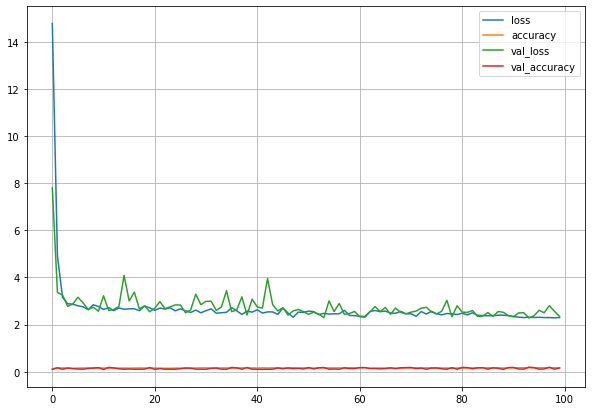

In [54]:
pd.DataFrame(BN1_drop_history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.show()

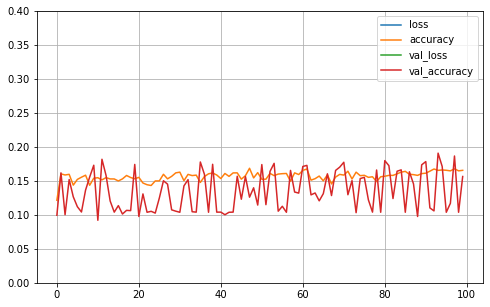

In [55]:
# accuracy only
pd.DataFrame(BN1_drop_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.4) # set the vertical range to [0-0.4] focus only on accuracy
plt.show()

In [56]:
# evaluate the model

evaluation_drop_BN1_valid = model_drop_BN1.evaluate(X_valid, y_valid)
evaluation_drop_BN1_test = model_drop_BN1.evaluate(X_test, y_test)

print(f"Evaluation on validation data: {evaluation_drop_BN1_valid}")
print(f"Evaluation on test data: {evaluation_drop_BN1_test}")

313/313 [==============================] - 1s 3ms/step - loss: 2.3444 - accuracy: 0.1503
Evaluation on validation data: [2.3429598808288574, 0.15639999508857727]
Evaluation on test data: [2.3444299697875977, 0.15029999613761902]


In [68]:
model_drop_new = keras.models.Sequential([
    keras.layers.Dropout(0.5) if isinstance(layer, keras.layers.Dropout) else layer
    for layer in model_drop_BN1.layers
])

In [70]:
# check updated dropout rate
model_drop_new.get_config()

{'name': 'sequential_4',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 32, 32, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_1_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten_1',
    'trainable': True,
    'batch_input_shape': (None, 32, 32, 3),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_21',
    'trainable': True,
    'dtype': 'float32',
    'units': 100,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': {'class_name': 'L2',
     'config': {'l2': 0.009999999776482582}},
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'BatchNormalization',
   

Let's add a couple utility functions. The first will run the model many times (10 by default) and it will return the mean predicted class probabilities. The second will use these mean probabilities to predict the most likely class for each instance:

In [71]:
def dropout_predict_probas(model_drop_new, X, n_samples=10):
    Y_probas = [model_drop_new.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def dropout_predict_classes(model_drop_new, X, n_samples=10):
    Y_probas = dropout_predict_probas(model_drop_new, X, n_samples)
    return np.argmax(Y_probas, axis=1)

Now let's make predictions for all the instances in the test set, and compute the accuracy:

In [72]:
tf.random.set_seed(42)
np.random.seed(42)

y_pred = dropout_predict_classes(model_drop_new, X_test)
accuracy = np.mean(y_pred == y_test[:, 0])
accuracy

0.1503

In [73]:
model_drop_new.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adam",
              metrics=["accuracy"])

In [74]:
model_drop_new.evaluate(X_test, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 2.3444 - accuracy: 0.1503


[2.3444299697875977, 0.15029999613761902]

In [75]:
# It seems that we get the same accuracy rate, but checking for configuration, the dropout rate actually changed
model_drop_new.get_config()

{'name': 'sequential_4',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 32, 32, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_1_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten_1',
    'trainable': True,
    'batch_input_shape': (None, 32, 32, 3),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_21',
    'trainable': True,
    'dtype': 'float32',
    'units': 100,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': {'class_name': 'L2',
     'config': {'l2': 0.009999999776482582}},
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'BatchNormalization',
   

In [79]:
# Alternatively, we could change the dropout rate and clone the model
# However, as stated by Keras documentation, when cloning the model weights would be reinitialized
# Maybe that's the point of this exercise

model_drop_BN1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_21 (Dense)            (None, 100)               307300    
                                                                 
 batch_normalization_20 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 activation_20 (Activation)  (None, 100)               0         
                                                                 
 dropout_60 (Dropout)        (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                      

 batch_normalization_33 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 activation_33 (Activation)  (None, 100)               0         
                                                                 
 dropout_73 (Dropout)        (None, 100)               0         
                                                                 
 dense_35 (Dense)            (None, 100)               10100     
                                                                 
 batch_normalization_34 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 activation_34 (Activation)  (None, 100)               0         
                                                                 
 dropout_74 (Dropout)        (None, 100)               0         
          

In [78]:
# check that dropout rate of original model hasnt changed
model_drop_BN1.get_config()

{'name': 'sequential_3',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 32, 32, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_1_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten_1',
    'trainable': True,
    'batch_input_shape': (None, 32, 32, 3),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_21',
    'trainable': True,
    'dtype': 'float32',
    'units': 100,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': {'class_name': 'L2',
     'config': {'l2': 0.009999999776482582}},
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'BatchNormalization',
   

In [85]:
# Change the rates in the layers model.layers[i].rate = 0.04  #layer[i] is the dropout layer
for i in range(4,84,4):
    model_drop_BN1.layers[i].rate = 0.5

# Clone this model to a new model using model = keras.models.clone(model) #weights would be reinitialized

model_drop_newest = tf.keras.models.clone_model(model_drop_BN1)

# Compile the new model model.compile(optimizer=..., loss=...) #optimizer state would be reset

model_drop_newest.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adam",
              metrics=["accuracy"])

In [86]:
model_drop_newest.evaluate(X_test, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 23.4788 - accuracy: 0.1001


[23.4787540435791, 0.10010000318288803]

In [88]:
# we could try to actually load the original's model weights, to see if that will give us the same accuracy

# save original model weights
model_drop_BN1.save_weights("model_drop_BN1.h5")

# Set the original weights to the new clone model model.load_weights(file_weights) #load weights
model_drop_newest.load_weights("model_drop_BN1.h5")

#Lastly let's evaluate again
model_drop_newest.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3444 - accuracy: 0.1503


[2.3444299697875977, 0.15029999613761902]

***Findings***
- As expected, when increasing the dropout rate from 0.2 to 0.5 and cloning the model (without loading original's weights, and by default initializing new ones), we see that the accuracy rate decreased. This is probably a sign that the optimal dropout rate could be even lower than 0.2
- However, when changing the dropout rate directly in the original model, or when cloning it and loading its original weights, the accuracy did not change even thought the dropout rate did
- By applying a dropout rate of 0.2 to our model_BN1 (L2 regularization + BN layer before the activation function), we actually get a better accuracy than without dropout (from 11.4 % to 15%)

### Extra: Testing adding dropout to model_BN2 (BN layer after activation function)

In [5]:
tf.random.set_seed(42)
np.random.seed(42)

model_drop = keras.models.Sequential()
model_drop.add(keras.layers.Flatten(input_shape=[32, 32, 3]))


# using the BN after activation function (BN2 set up)
# dropout rate of 2

for _ in range(20):
    model_drop.add(tf.keras.layers.Dense(100, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)))
    model_drop.add(tf.keras.layers.BatchNormalization())
    model_drop.add(keras.layers.Dropout(rate=0.2))

#output layer

model_drop.add(tf.keras.layers.Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.01)))

model_drop.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adam",
              metrics=["accuracy"])

drop_history = model_drop.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 21s 12ms/step - loss: 18.8002 - accuracy: 0.1025 - val_loss: 14.1481 - val_accuracy: 0.0974
Epoch 2/100
1407/1407 [==============================] - 16s 11ms/step - loss: 10.7296 - accuracy: 0.1372 - val_loss: 8.0206 - val_accuracy: 0.1360
Epoch 3/100
1407/1407 [==============================] - 16s 11ms/step - loss: 5.9929 - accuracy: 0.1700 - val_loss: 4.5447 - val_accuracy: 0.1510
Epoch 4/100
1407/1407 [==============================] - 17s 12ms/step - loss: 3.6387 - accuracy: 0.1714 - val_loss: 3.0745 - val_accuracy: 0.1382
Epoch 5/100
1407/1407 [==============================] - 15s 11ms/step - loss: 2.7070 - accuracy: 0.1687 - val_loss: 2.6273 - val_accuracy: 0.1382
Epoch 6/100
1407/1407 [==============================] - 16s 11ms/step - loss: 2.5407 - accuracy: 0.1641 - val_loss: 2.6705 - val_accuracy: 0.1536
Epoch 7/100
1407/1407 [==============================] - 16s 11ms/step - loss: 2.5514 - accuracy: 0.1641 - val_loss

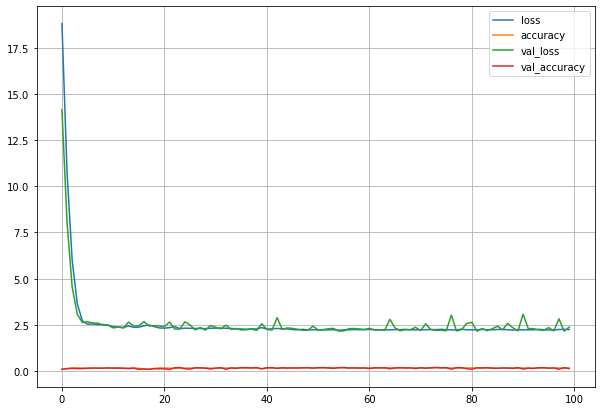

In [6]:
pd.DataFrame(drop_history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.show()

In [7]:
# evaluate the model

evaluation_drop_valid = model_drop.evaluate(X_valid, y_valid)
evaluation_drop_test = model_drop.evaluate(X_test, y_test)

print(f"Evaluation on validation data: {evaluation_drop_valid}")
print(f"Evaluation on test data: {evaluation_drop_test}")

313/313 [==============================] - 1s 3ms/step - loss: 2.3860 - accuracy: 0.1349
Evaluation on validation data: [2.383037805557251, 0.13940000534057617]
Evaluation on test data: [2.3860294818878174, 0.13490000367164612]


#### Without retraining your model, see if you can achieve better accuracy using different rate of Dropout.

In [8]:
# original 
model_drop.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 32, 32, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_1_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten_1',
    'trainable': True,
    'batch_input_shape': (None, 32, 32, 3),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_21',
    'trainable': True,
    'dtype': 'float32',
    'units': 100,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': {'class_name': 'L2',
     'config': {'l2': 0.009999999776482582}},
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'BatchNormalization',
   'c

In [36]:
# test dropout rate of 0.5

model_drop2 = keras.models.Sequential([
    keras.layers.Dropout(0.5) if isinstance(layer, keras.layers.Dropout) else layer
    for layer in model_drop.layers
])

In [37]:
# each dropout layer should now have a rate of 0.5
model_drop2.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 32, 32, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_1_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten_1',
    'trainable': True,
    'batch_input_shape': (None, 32, 32, 3),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_21',
    'trainable': True,
    'dtype': 'float32',
    'units': 100,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': {'class_name': 'L2',
     'config': {'l2': 0.009999999776482582}},
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'BatchNormalization',
   'con

In [43]:
# Same functions used before
def dropout_predict_probas(model_drop2, X, n_samples=20):
    Y_probas = [model_drop2.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def dropout_predict_classes(model_drop2, X, n_samples=20):
    Y_probas = dropout_predict_probas(model_drop2, X, n_samples)
    return np.argmax(Y_probas, axis=1)

Now let's make predictions for all the instances in the test set, and compute the accuracy:

In [44]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = dropout_predict_classes(model_drop2, X_test)
accuracy_new = np.mean(y_pred == y_test[:, 0])
accuracy_new

0.1349

In [13]:
# to double check
model_drop2.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adam",
              metrics=["accuracy"])

In [14]:
model_drop2.evaluate(X_test, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 2.3860 - accuracy: 0.1349


[2.3860294818878174, 0.13490000367164612]

We also get the same accuracy rate. We will use BN1 for early stopping since it gave better accuracy score on test data

### Question 2.5 (10 points) 

Add Earlystopping to the model and save the model at the early stopping epoch using the callbacks. 

Last, load the model and evaluate on the test set.

In [91]:
tf.random.set_seed(42)
np.random.seed(42)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10) # after 10 epochs with no improvement the model will stop training
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10_model.h5", save_best_only=True)
callbacks = [early_stopping_cb, model_checkpoint_cb]

In [93]:
model_drop_BN1.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adam",
              metrics=["accuracy"])

In [94]:
#stop using callbacks
#add earlystopping to previous model (l2 regularization + BN + dropout at 0.2)

early_history = model_drop_BN1.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 21s 12ms/step - loss: 2.4190 - accuracy: 0.1479 - val_loss: 2.4555 - val_accuracy: 0.1642
Epoch 2/100
1407/1407 [==============================] - 16s 12ms/step - loss: 2.4620 - accuracy: 0.1471 - val_loss: 2.5837 - val_accuracy: 0.1338
Epoch 3/100
1407/1407 [==============================] - 16s 11ms/step - loss: 2.5135 - accuracy: 0.1483 - val_loss: 2.5716 - val_accuracy: 0.1492
Epoch 4/100
1407/1407 [==============================] - 16s 12ms/step - loss: 2.5078 - accuracy: 0.1500 - val_loss: 2.4360 - val_accuracy: 0.1784
Epoch 5/100
1407/1407 [==============================] - 16s 12ms/step - loss: 2.4883 - accuracy: 0.1506 - val_loss: 2.5953 - val_accuracy: 0.1524
Epoch 6/100
1407/1407 [==============================] - 16s 12ms/step - loss: 2.5369 - accuracy: 0.1505 - val_loss: 2.5216 - val_accuracy: 0.1432
Epoch 7/100
1407/1407 [==============================] - 16s 11ms/step - loss: 2.5917 - accuracy: 0.1387 - val_loss: 2

In [95]:
# load best model and evaluate on test set

model_early_best = keras.models.load_model("cifar10_model.h5")
model_early_best.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.4419 - accuracy: 0.1707


[2.4418883323669434, 0.17069999873638153]

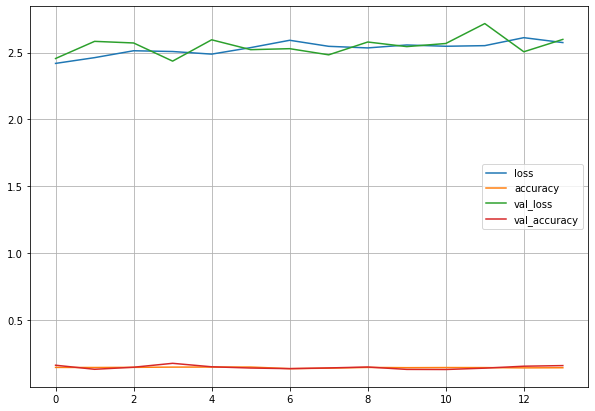

In [96]:
# plot results

pd.DataFrame(early_history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.show()

***Findings***:
- We can see that by using early stopping and retrieving the best model configuration, we can actually save a lot of time in computing since the model that we were using only needed 20 epochs to not longer improve (with a patience of 10, that is, after 10 epochs of no improvement it will stop). 

### Question 2.6 Convolutional Neural Network (15 points)

Now, let's define the Convolutional Neural Network. 

❓ **Question** ❓ Define a CNN that is composed of:
- a Conv2D layer with 32 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 64 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 128 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (3, 3)
- a Flatten layer
- a dense function with 120 neurons with the `relu` activation function
- a dense function with 60 neurons with the `relu` activation function
- a dropout layer (with a rate of 0.5), to regularize the network
- a dense function related to your task

Estimate the model using the same compilation configuration and report your test accuracy. 

In [54]:
model_cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3),input_shape=(32,32,3), activation='relu', padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3),input_shape=(32,32,3), activation='relu', padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3),input_shape=(32,32,3), activation='relu', padding="same"),
    keras.layers.MaxPooling2D(pool_size=(3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=120, activation='relu'),
    keras.layers.Dense(units=60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [55]:
# same compilation configuration
model_cnn.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam", metrics=["accuracy"])

In [56]:
# apply early stopping

early_stopping_cnn = keras.callbacks.EarlyStopping(patience=10) # after 10 epochs with no improvement the model will stop training
model_checkpoint_cnn = keras.callbacks.ModelCheckpoint("cifar10_cnn_model.h5", save_best_only=True)
callbacks_cnn = [early_stopping_cnn, model_checkpoint_cnn]

In [57]:
early_cnn_history = model_cnn.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks_cnn)

Epoch 1/100
1407/1407 [==============================] - 33s 23ms/step - loss: 2.3536 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.0976
Epoch 2/100
1407/1407 [==============================] - 32s 23ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3029 - val_accuracy: 0.0972
Epoch 3/100
1407/1407 [==============================] - 32s 23ms/step - loss: 2.3058 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.1010
Epoch 4/100
1407/1407 [==============================] - 32s 23ms/step - loss: 2.3028 - accuracy: 0.0964 - val_loss: 2.3026 - val_accuracy: 0.1038
Epoch 5/100
1407/1407 [==============================] - 32s 23ms/step - loss: 2.3028 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.0972
Epoch 6/100
1407/1407 [==============================] - 33s 23ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3028 - val_accuracy: 0.0920
Epoch 7/100
1407/1407 [==============================] - 32s 23ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2

In [58]:
cnnmodel_early_best = keras.models.load_model("cifar10_cnn_model.h5")

In [170]:
# evaluate best model reporting test and valid accuracy

cnn_best_valid = cnnmodel_early_best.evaluate(X_valid, y_valid)
cnn_best_test = cnnmodel_early_best.evaluate(X_test, y_test)

print(f"Evaluation on validation data: {cnn_best_valid}")
print(f"Evaluation on test data: {cnn_best_test}")

313/313 [==============================] - 2s 7ms/step - loss: 2.3026 - accuracy: 0.1000
Evaluation on validation data: [2.3026070594787598, 0.10379999876022339]
Evaluation on test data: [2.302605390548706, 0.10000000149011612]


**Accuracy on test data was 10%**

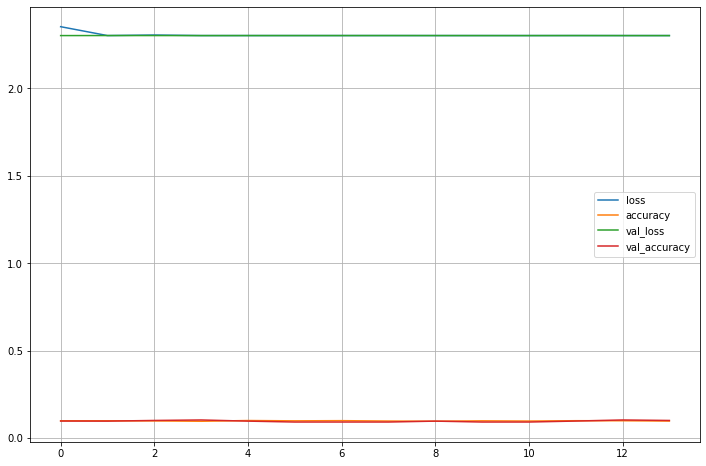

In [60]:
pd.DataFrame(early_cnn_history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.show()

### Question 2.7 Transfer learning (15 points)

In this question, we will use the [VGG-16 Neural Network](https://neurohive.io/en/popular-networks/vgg16/), a well-known architecture that has been trained on ImageNet which is a very large database of images of different categories. In a nutshell, this architecture has already learnt kernels which are supposed to be good not only for the task it has been train on but maybe for other tasks. 

The idea is that first layers are not specialized for the particular task it has been trained on; only the last ones are. Therefore, we will load the existing VGG16 network, remove the last fully connected layers, replace them by new connected layers (whose weights are randomly set), and train these last layers on a specific classification task - here, separate types of flower. The underlying idea is that the first convolutional layers of VGG-16, that has already been trained, corresponds to filters that are able to extract meaning features from images. And you will only learn the last layers for your particular problem.

❓ **Question** ❓ Write a first function `load_model()` that loads the pretrained VGG-16 model from `tensorflow.keras.applications.vgg16`. Especially, look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16) to load the model where:
- the `weights` have been learnt on `imagenet`
- the `input_shape` corresponds to the input shape of any of your images - you have to resize them in case they are not of the same size
- the `include_top` argument is set to `False` in order not to load the fully-connected layers of the VGG-16 without the last layer which was specifically trained on `imagenet`

Write a function that takes the previous model as input the set the girst layers to be non-trainable, by applying `model.trainable = False`. Then check-out the summary of the model to see that now, the parameters are `non-trainable`. Then write a function that adds flattening and dense layers after the first convolutional layers. You can define each layer (or group of layers) separately and concatenate them using the classic `layers.Sequential()` like below: 

```
model = tf.keras.Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])
```

Replicate the above steps by adding a flattening and two dense layers (the first with 500 neurons) to the previous VGG-16 model.

Estimate the model using the same compilation configuration and report the test accuracy. 

In [64]:
# non specified hyperparameters were left at default for the VGG16 model
def load_model():
    model = VGG16(
        weights='imagenet',
        input_shape=(32,32,3),
        include_top=False)
    return model

In [65]:
def freeze_model():
    model = load_model()
    model.trainable = False
    print(model.summary())
    return model

In [66]:
def final_model():
    
    transfer_model = freeze_model()
    flattening_layer = keras.layers.Flatten()
    dense_layer_one = keras.layers.Dense(500, activation="relu")
    #dense_layer_two = keras.layers.Dense(250, activation="relu") I believe the 2nd dense layer refers to the prediction layer
    # but if not, uncomment dense_layer_two
    prediction_layer = keras.layers.Dense(10, activation="softmax")
    
    
    adapted_model = keras.models.Sequential([
        transfer_model,
        flattening_layer,
        dense_layer_one,
        #dense_layer_two,
        prediction_layer])
        
    adapted_model.compile(optimizer="adam",
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"])
    
    print(transfer_model.summary())
    return adapted_model

In [67]:
model_final = final_model()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [68]:
# apply early stopping

early_stopping_cnn = keras.callbacks.EarlyStopping(patience=10) # after 10 epochs with no improvement the model will stop training
model_checkpoint_cnn = keras.callbacks.ModelCheckpoint("cifar10_cnn_model.h5", save_best_only=True)
callbacks_cnn = [early_stopping_cnn, model_checkpoint_cnn]

model_final_history = model_final.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks_cnn)

Epoch 1/100
1407/1407 [==============================] - 33205s 24s/step - loss: 2.3107 - accuracy: 0.5072 - val_loss: 1.2651 - val_accuracy: 0.5688
Epoch 2/100
1407/1407 [==============================] - 125s 89ms/step - loss: 1.1252 - accuracy: 0.6143 - val_loss: 1.2577 - val_accuracy: 0.5876
Epoch 3/100
1407/1407 [==============================] - 122s 87ms/step - loss: 1.0233 - accuracy: 0.6472 - val_loss: 1.2658 - val_accuracy: 0.5966
Epoch 4/100
1407/1407 [==============================] - 119s 85ms/step - loss: 0.9670 - accuracy: 0.6682 - val_loss: 1.3167 - val_accuracy: 0.5904
Epoch 5/100
1407/1407 [==============================] - 121s 86ms/step - loss: 0.9032 - accuracy: 0.6880 - val_loss: 1.3510 - val_accuracy: 0.6088
Epoch 6/100
1407/1407 [==============================] - 121s 86ms/step - loss: 0.8270 - accuracy: 0.7132 - val_loss: 1.4610 - val_accuracy: 0.5890
Epoch 7/100
1407/1407 [==============================] - 121s 86ms/step - loss: 0.7566 - accuracy: 0.7391 - val

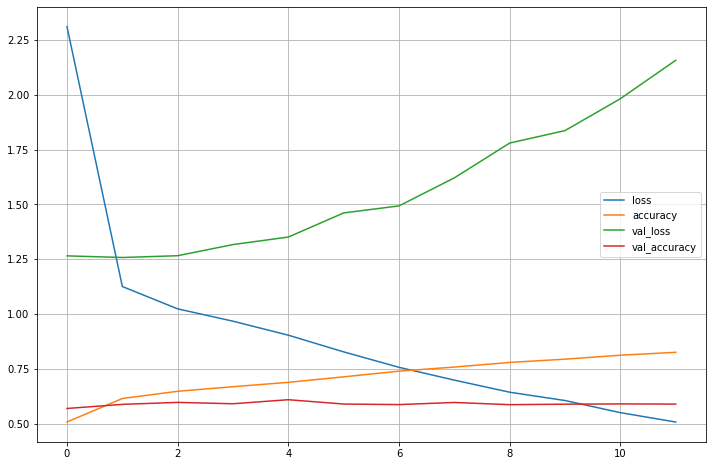

In [69]:
pd.DataFrame(model_final_history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.show()

In [70]:
# report test accuracy
model_final.evaluate(X_test, y_test)

313/313 [==============================] - 23s 74ms/step - loss: 2.1706 - accuracy: 0.5828


[2.1705822944641113, 0.5827999711036682]

**Accuracy on test data was 58%**

**Findings**:
- The accuracy increased from 10 % to 58 %. The model is still not great, but it drastically improved. This shows the benefits of using a pretrained model for similar tasks, only by changing the top layer to adapt it to our task at hand, and leaving the rest of the layers frozen